In [ ]:
import pandas as pd

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 한글폰트설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [ ]:
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')


In [ ]:
# 음수부호 표시하도록 설정
plt.rc("axes", unicode_minus = False)
""
# warning메시지 무시
import warnings
warnings.filterwarnings('ignore')

In [ ]:
test = pd.read_csv('/content/drive/MyDrive/캐글/주택가격예측/test.csv')
train = pd.read_csv('/content/drive/MyDrive/캐글/주택가격예측/train.csv')
sample = pd.read_csv('/content/drive/MyDrive/캐글/주택가격예측/sample_submission.csv')

In [ ]:
test.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

Text(0.5, 1.0, 'train의 타겟분포')

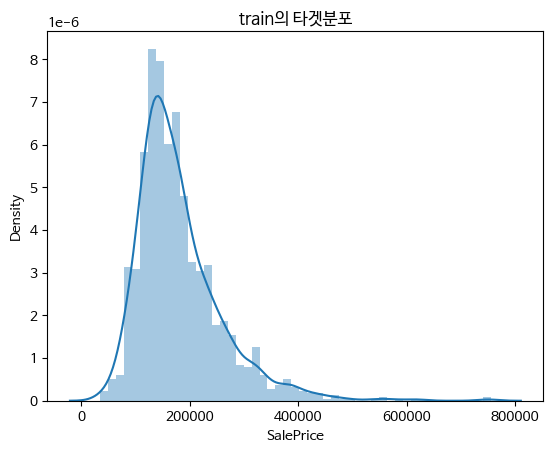

In [ ]:
# 타겟데이터의 분포 확인
sns.distplot(train['SalePrice'])
plt.title('train의 타겟분포')


<Axes: xlabel='SalePrice', ylabel='Density'>

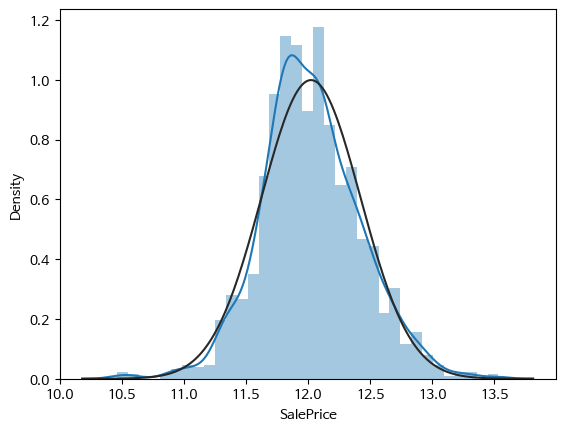

In [ ]:
from scipy import stats
from scipy.stats import norm

# 로그를 취해서 정규분포화 시켜주었다.
train['SalePrice'] = np.log1p(train["SalePrice"])
sns.distplot(train['SalePrice'],fit=norm)

In [ ]:
# 전처리를 위하여 두 데이터를 all 이라는 df로 만들어주었다.
all = pd.concat([train, test], sort=False).reset_index(drop=True)

In [ ]:
all.dtypes.head(60)

Id                int64
MSSubClass        int64
MSZoning         object
LotFrontage     float64
LotArea           int64
Street           object
Alley            object
LotShape         object
LandContour      object
Utilities        object
LotConfig        object
LandSlope        object
Neighborhood     object
Condition1       object
Condition2       object
BldgType         object
HouseStyle       object
OverallQual       int64
OverallCond       int64
YearBuilt         int64
YearRemodAdd      int64
RoofStyle        object
RoofMatl         object
Exterior1st      object
Exterior2nd      object
MasVnrType       object
MasVnrArea      float64
ExterQual        object
ExterCond        object
Foundation       object
BsmtQual         object
BsmtCond         object
BsmtExposure     object
BsmtFinType1     object
BsmtFinSF1      float64
BsmtFinType2     object
BsmtFinSF2      float64
BsmtUnfSF       float64
TotalBsmtSF     float64
Heating          object
HeatingQC        object
CentralAir      

In [ ]:
	# 1	MSSubClass: 주택의 건축 유형을 식별합니다. 숫자 코드로 주어지며, 각 코드는 특정 건축 유형을 나타냅니다.
	# 2	MSZoning: 부동산의 일반적인 분류를 나타냅니다. 각 코드는 특정 지역 구역을 나타냅니다.
	# 3	LotFrontage: 부동산과 연결된 도로의 선형 길이(피트 단위)를 나타냅니다.
	# 4	LotArea: 부동산의 대지 크기를 나타냅니다. 이 값은 평방 피트 단위로 표시됩니다.
	# 5	Street: 부동산에 대한 도로 접근 유형을 나타냅니다.
	# 6	Alley: 부동산에 대한 골목 접근 유형을 나타냅니다.
	# 7	LotShape: 부동산의 일반적인 형태를 나타냅니다.
	# 8	LandContour: 부동산의 평평함을 나타냅니다.
	# 9	Utilities: 이용 가능한 유틸리티 유형을 나타냅니다.
	# 10	LotConfig: 부동산의 대지 설정을 나타냅니다.
	# 11	LandSlope: 부동산의 경사를 나타냅니다.
	# 12	Neighborhood: 부동산이 위치한 물리적인 위치를 나타냅니다.
	# 13	Condition1 및 Condition2: 부동산의 다양한 조건에 대한 근접성을 나타냅니다.
	# 14	BldgType: 주거 유형을 나타냅니다.
	# 15	HouseStyle: 주거 유형의 스타일을 나타냅니다.
	# 16	OverallQual 및 OverallCond: 주택의 전체적인 품질 및 상태를 평가합니다.
	# 17	YearBuilt 및 YearRemodAdd: 주택의 원래 건설 날짜와 리모델링 날짜를 나타냅니다.
	# 18	RoofStyle 및 RoofMatl: 지붕의 유형과 재료를 나타냅니다.
	# 19	Exterior1st 및 Exterior2nd: 주택의 외장재를 나타냅니다.
	# 20	MasVnrType 및 MasVnrArea: 석조 베니어 유형과 면적을 나타냅니다.
	# 21	ExterQual 및 ExterCond: 외부 소재의 품질과 상태를 평가합니다.
	# 22	Foundation: 건축물의 기초 유형을 나타냅니다.
	# 23	BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2: 지하실의 높이, 일반 상태, 외부 노출, 마감된 공간 및 지하실 유형을 나타냅니다.
	# 24	BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF: 지하실 면적을 나타냅니다.
	# 25	Heating 및 HeatingQC: 난방 시스템과 난방 품질을 나타냅니다.
	# 26	CentralAir: 중앙 에어컨 시스템의 유무를 나타냅니다.
	# 27	Electrical: 전기 시스템을 나타냅니다.
	# 28	1stFlrSF, 2ndFlrSF, LowQualFinSF, GrLivArea: 주거 공간의 크기를 나타냅니다.
	# 29	BsmtFullBath, BsmtHalfBath, FullBath, HalfBath: 욕실의 수를 나타냅니다.
	# 30	BedroomAbvGr, KitchenAbvGr: 침실과 주방의 수를 나타냅니다.
	# 31	KitchenQual: 주방의 품질을 나타냅니다.
	# 32	TotRmsAbvGrd: 전체 방의 수를 나타냅니다.
	# 33	Functional: 집의 기능성을 나타냅니다.
	# 34	Fireplaces 및 FireplaceQu: 벽난로의 수와 품질을 나타냅니다.
	# 35	GarageType, GarageYrBlt, GarageFinish, GarageCars, GarageArea, GarageQual, GarageCond: 차고에 관련된 정보를 나타냅니다.
	# 36	PavedDrive: 포장된 차도의 유무를 나타냅니다.
	# 37	WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch: 부동산의 다양한 형태의 현관과 데크 면적을 나타냅니다.
	# 38	PoolArea 및 PoolQC: 수영장의 크기와 품질을 나타냅니다.
	# 39	Fence: 울타리의 품질을 나타냅니다.
	# 40	MiscFeature 및 MiscVal: 기타 특징과 해당 값의 가치를 나타냅니다.
	# 41	MoSold 및 YrSold: 판매가 이루어진 월과 년도를 나타냅니다.
	# 42	SaleType 및 SaleCondition: 판매 유형과 판매 상태를 나타냅니다.

In [ ]:
# int형과 obj형의 데이터별로 전처리하기위해 분리해주었다.
int_cols = all.select_dtypes(include=['int64','float64'])
obj_cols = all.select_dtypes(include=['object'])


In [ ]:
all.info() # 81개컬럼이 있다.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2919 entries, 0 to 2918
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [ ]:
# int데이터의 결측치 확인
int_cols.isna().sum()

Id                  0
MSSubClass          0
LotFrontage       486
LotArea             0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea         23
BsmtFinSF1          1
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        2
BsmtHalfBath        2
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
TotRmsAbvGrd        0
Fireplaces          0
GarageYrBlt       159
GarageCars          1
GarageArea          1
WoodDeckSF          0
OpenPorchSF         0
EnclosedPorch       0
3SsnPorch           0
ScreenPorch         0
PoolArea            0
MiscVal             0
MoSold              0
YrSold              0
SalePrice        1459
dtype: int64

#결측치 제거


(0.0, 30000.0)

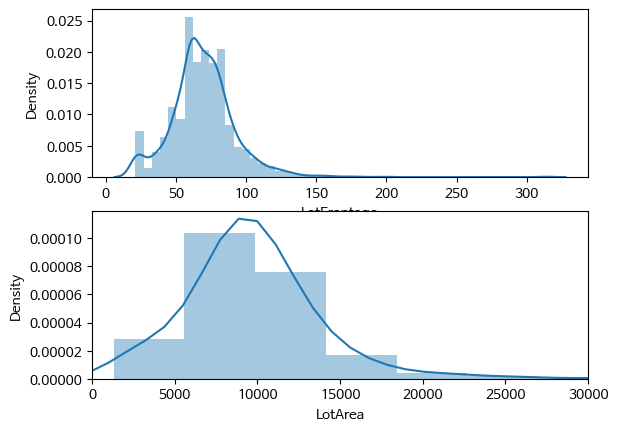

In [ ]:
# 3	LotFrontage: 부동산과 연결된 도로의 선형 길이(피트 단위)를 나타냅니다.
# 4	LotArea: 부동산의 대지 크기를 나타냅니다. 이 값은 평방 피트 단위로 표시됩니다.

# LotFrontage와 LotArea간 상관관계가 있을것이라고 예상하였다.
fig, ax = plt.subplots(2,1)
sns.distplot(int_cols['LotFrontage'],ax=ax[0])
sns.distplot(int_cols['LotArea'], ax= ax[1])
ax[1].set_xlim([0,30000])

<Axes: xlabel='LotArea', ylabel='LotFrontage'>

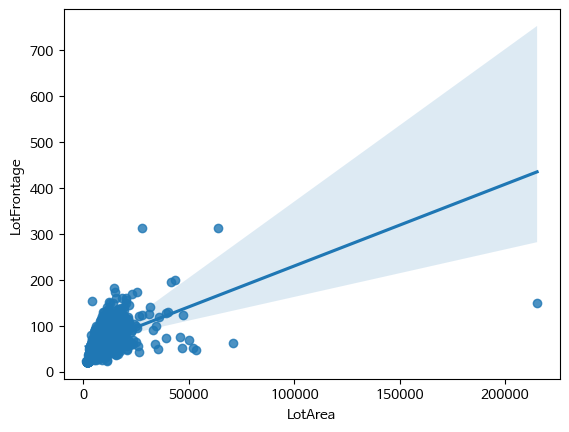

In [ ]:
# 회귀선을 직접 그려본 결과 어느정도 상관관계가 존재하고, 실제 데이터를 보았을 때도 비례하는 것을 볼 수 있었다.
sns.regplot(x=int_cols['LotArea'], y=int_cols['LotFrontage'])

<Axes: >

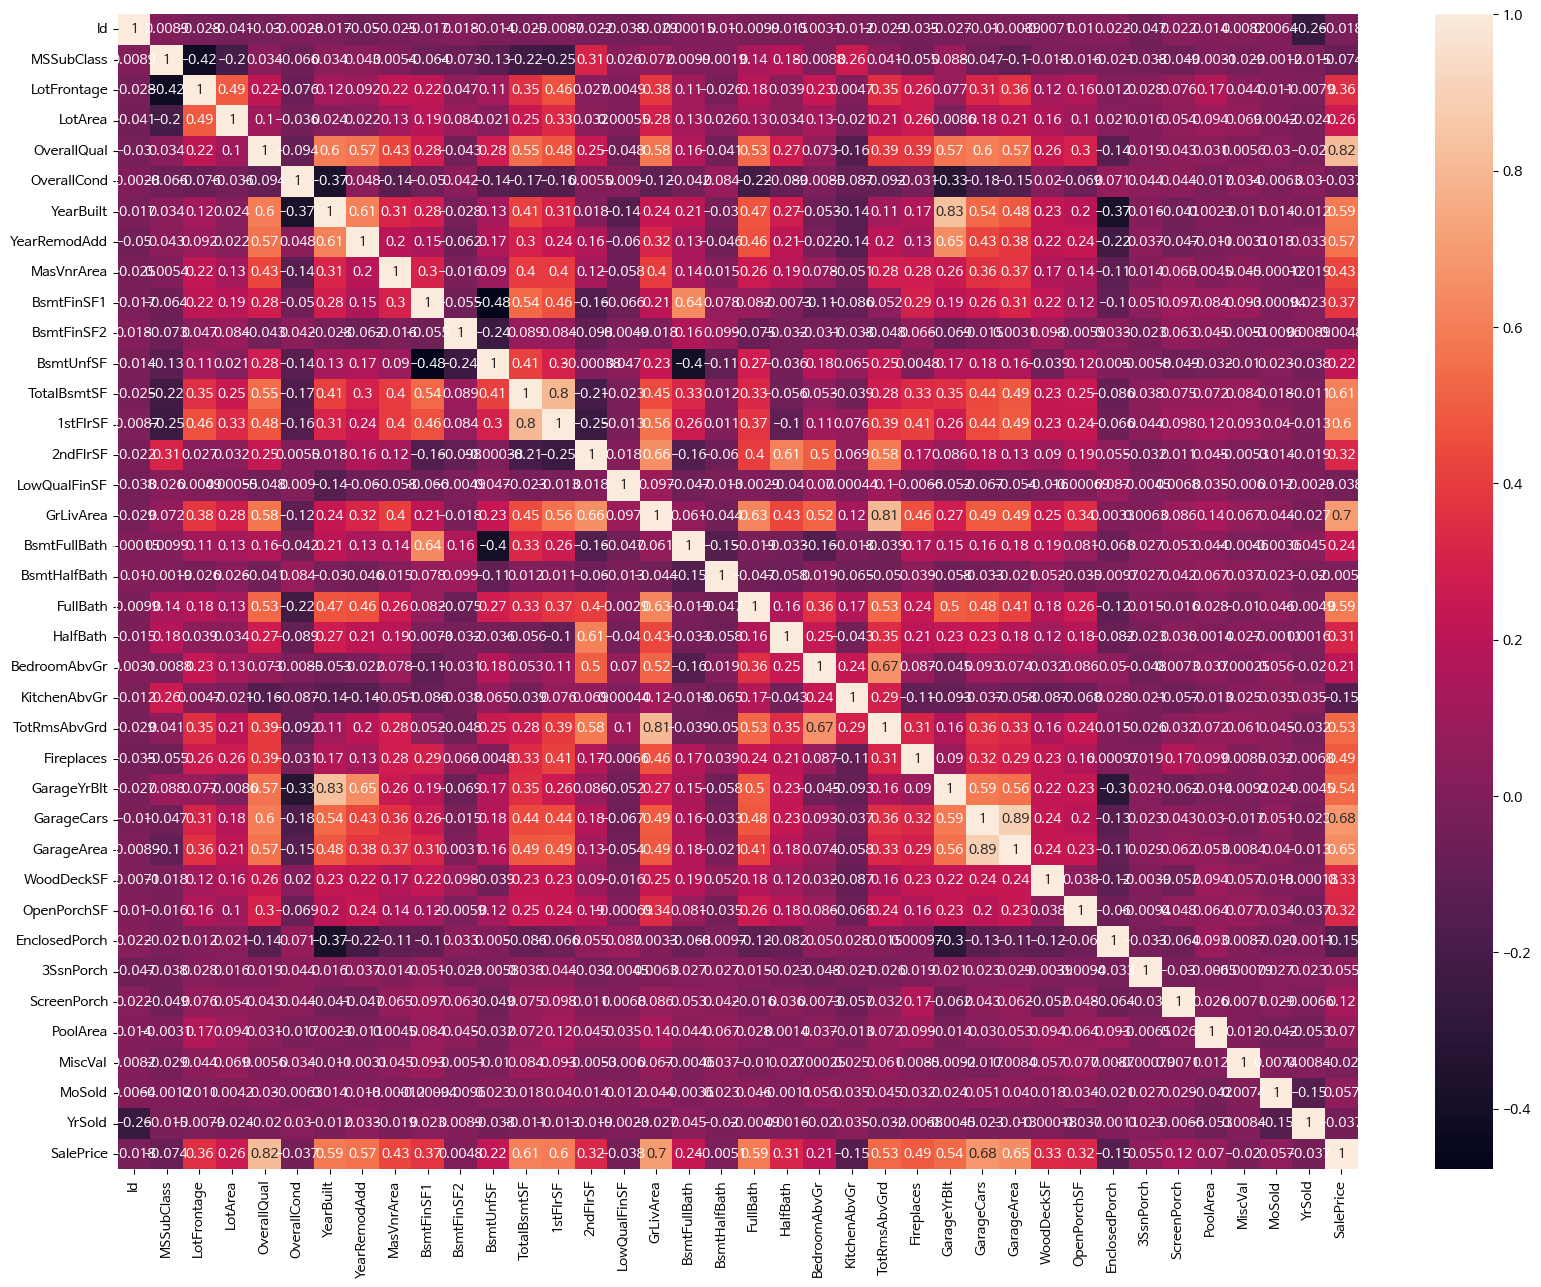

In [ ]:
# LotFrontage와 LotArea의 상관계수값은 0.49로 두 변수는 상관성이 존재한다.
plt.figure(figsize=(20,15))
sns.heatmap(int_cols.corr(), annot=True)

In [ ]:
# LotFrontage와 LotArea는 비례하는 경향성이 있었다. 따라서, LotArea로 sort한 뒤, ffill처리하여 결측치를 채웠다.
all.sort_values(by='LotArea',inplace=True)
all['LotFrontage'].fillna(method='ffill',inplace=True)
all.sort_values(by='Id', inplace=True)

# 나머지 Int컬럼 0처리 데이터의 설명서에 따라 결측치는 해당 값이 없는 것으로 0 처리를 해주면 되었다.
all["MasVnrArea"] = all["MasVnrArea"].fillna(0)
for col in ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'GarageCars', 'GarageArea',
            'BsmtFullBath', 'BsmtHalfBath', 'GarageArea','GarageYrBlt']:
            all[col].fillna(0, inplace=True)

# -----------------------------------------------------------------------------------


# obj 데이터는 이번 과제에선 사용하지 않았다.

# obj 결측치 처리
all['MSZoning'] = all['MSZoning'].fillna(all['MSZoning'].mode()[0])
all['Alley'].fillna(0,inplace=True)
all['Utilities'] = all['Utilities'].fillna(all['Utilities'].mode()[0])
all['Exterior1st'] = all['Exterior1st'].fillna(all['Exterior1st'].mode()[0])
all['Exterior2nd'] = all['Exterior2nd'].fillna(all['Exterior2nd'].mode()[0])
all['MasVnrType'] = all['MasVnrType'].fillna('None')

for col in ['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2']:
  all[col].fillna('None', inplace=True)

all['Electrical'].fillna(all['Electrical'].mode()[0], inplace=True)
all['KitchenQual'].fillna(all['KitchenQual'].mode()[0], inplace=True)
all['Functional'].fillna(all['Functional'].mode()[0], inplace=True)

for col in ['FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PoolQC', 'Fence', 'MiscFeature']:
  all[col].fillna('None', inplace=True)

all['SaleType'].fillna(all['SaleType'].mode()[0],inplace=True)

In [ ]:
pd.set_option('display.max_rows', 100)  # 모든 행 표시
pd.set_option('display.max_columns', None)

In [ ]:
# 타겟값을 제외하고 모든 결측치가 사라졌다.
all.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage         0
LotArea             0
Street              0
Alley               0
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          0
MasVnrArea          0
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual            0
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          0
BsmtFinType2        0
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFin

# int형 데이터들만 처리해서 모델링 피쳐로 사용하기

In [ ]:
# 상관계수 0.3 이하는 피처로 사용하지 않음
# 0.3 이상 값을 가지는 컬럼만 따로 high_corr에 넣어주었다.
high_corr = corr[corr['SalePrice'] >= 0.3].index
high_corr

# hig_corr에서 타겟컬럼(SalePrice)을 제외한 컬럼들만 모아두었다.
high_corr_test = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

<Axes: >

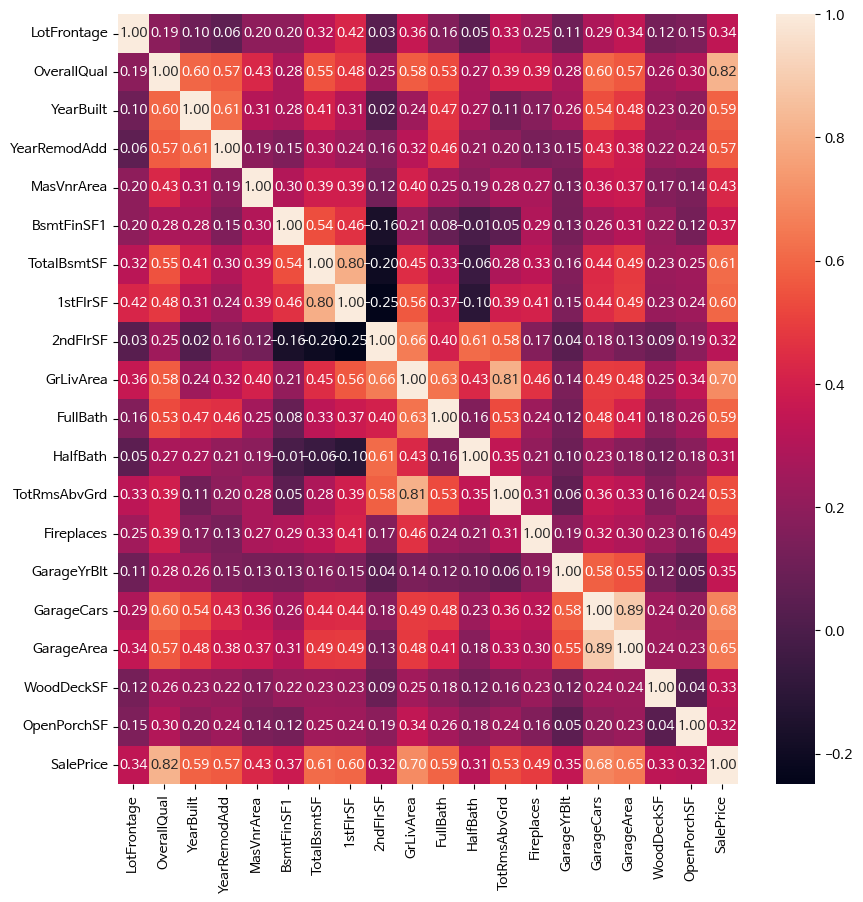

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(all[high_corr].corr(), annot=True, fmt='.2f')

<Axes: >

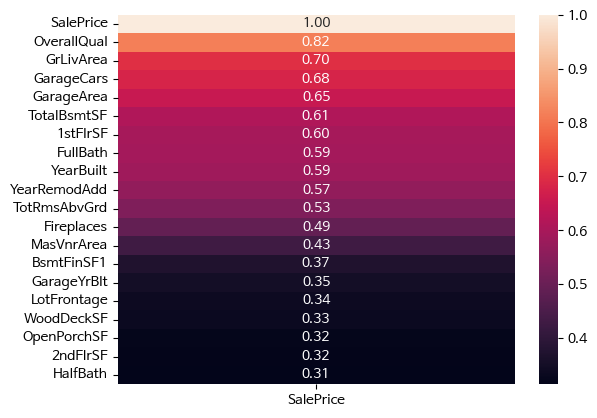

In [ ]:
# SalePrice와 상관관계가 높은 변수들을 보았다.
y_corr=all[high_corr].corr()
corr = y_corr[['SalePrice']].sort_values(by='SalePrice', ascending=False)


sns.heatmap(corr,annot=True, fmt='.2f')

# OverallQual = 전체적인 주택 퀄리티
# GrLivArea = 주거 공간의 크기
# GarageARea = 차고의 크기
# GarageCars = 차고가 수용할 수 있는 차의 수
# TotalBsmtSF = 지하창고의 크기

# 상관분석을 했을 때, 기본적 상식선에서 생각할 수 있는 요소(주택퀄리티, 차고의 크기 등)들이 크거나 많을 경우, 주택가격이 올라가는 추세를 보였다.

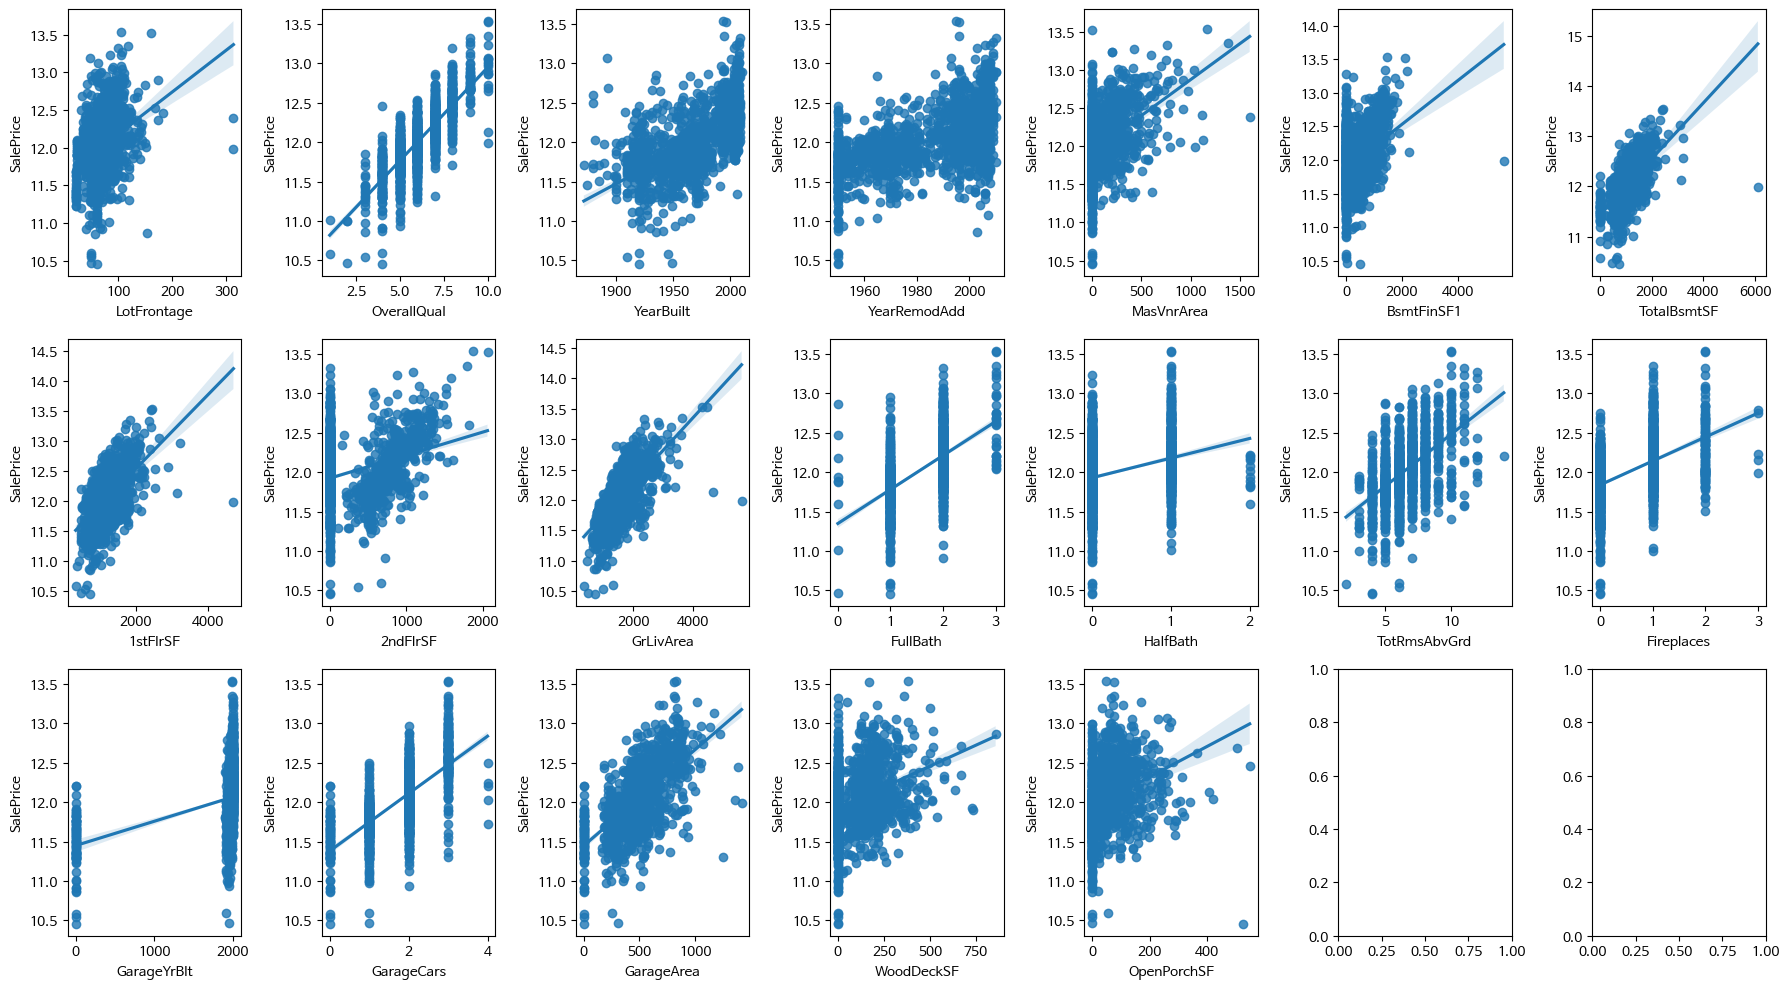

In [ ]:
# 상관계수가 0.3이상인 변수들의 그래프를 보았을때도, 변수들과 주택가격간의 비례의 관계를 보인다고 볼 수 있었다.
idx = high_corr

fig, ax = plt.subplots(3,7, figsize=(18,10))

for i in range(19):
  sns.regplot(x=all[idx[i]], y=all['SalePrice'], ax= ax [i//7, i %7])

plt.tight_layout()

In [ ]:
# 전처리를 위해 합쳤던 all 데이터를 다시 train_X / test_X로 분리해주었다.
train_X = all.loc[0:1459]
test_X = all.loc[1460:]

# train_X와 test_X에 다시 high_corr인 컬럼들을 넣어주고
# train_Y 에는 타겟값인 SalePrice를 넣어주었다.
train_X = train_X[high_corr]
test_X = test_X[high_corr]
train_y = train_X['SalePrice']

In [ ]:
# train_X에 SalePrice를 제거 (타겟값)
train_X.drop('SalePrice',axis=1,inplace=True)

# Kfold + 단순선형회귀

In [ ]:
# test데이터에는 y값이 존재하지 않는다(saleprice값이 없음)
# 따라서 train_X를 train_input과 val_input으로 나누어 주었다.
from sklearn.model_selection import train_test_split
train_input, val_input, train_target, val_target = train_test_split(train_X, train_y)


In [ ]:
from sklearn.linear_model import LinearRegression
lr =LinearRegression()
from sklearn.model_selection import cross_validate, KFold
from sklearn.model_selection import cross_val_score

train_scores = cross_val_score(lr, train_X, train_y, cv=5)
train_scores.mean()

# 단순 회귀분석과 kfold 5번 교차검증을 했을때 80%의 정확도를 보인다.

0.816682702103827

In [ ]:
lr.fit(train_input,train_target)
print(lr.score(train_input,train_target))
print(lr.score(val_input,val_target))

# train데이터와 val데이터에 넣었을때, 83%, 85%의 값을 보인다.
# Obj 컬럼이 사용되지 않아 과소적합이 의심된다.

0.8362336745233223
0.8502937539779876


In [ ]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(train_target,lr.predict(train_input) )

rmse = np.sqrt(mse)

print("MSE:", mse)
print("RMSE:", rmse)

# 오차값을 보았을 때, mse는 0.027/ rmse는 0.166이었다.

MSE: 0.027598834222444017
RMSE: 0.16612896864317198


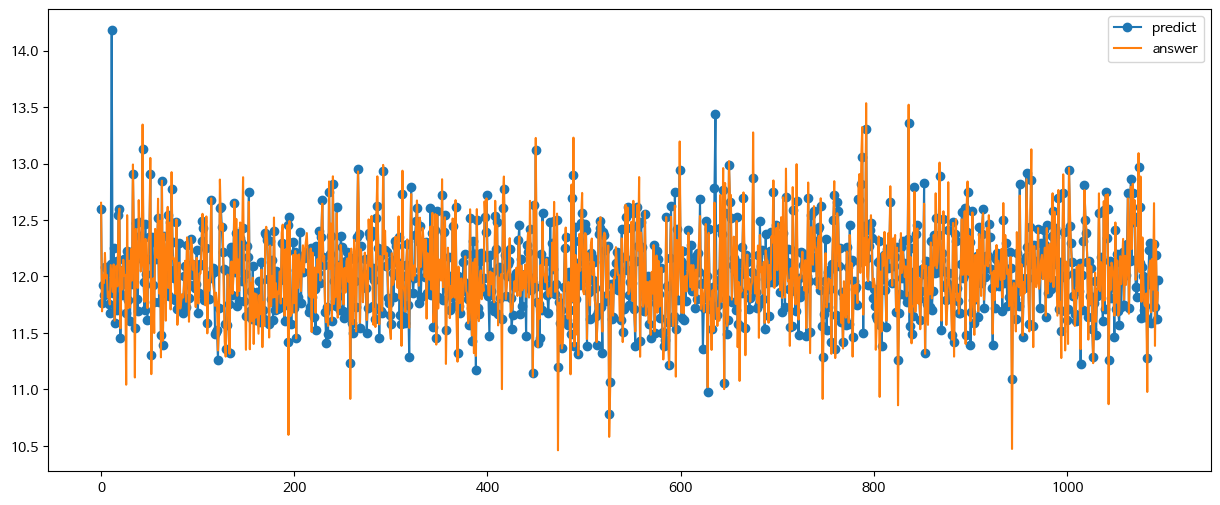

In [ ]:
train_tar=pd.DataFrame(train_target)
train_predict=pd.DataFrame(lr.predict(train_input),index=train_tar.index, columns=['predict'])


df = train_predict.merge(train_tar, on =train_tar.index)

plt.figure(figsize=(15,6))
plt.plot(df['predict'],'o-',label='predict')
plt.plot(df['SalePrice'],'-',label='answer')
plt.legend()


# 그래프로 어느정도 예상과 실제 값을 비교해서 그려보았다.
# 중간에 튀는 데이터들(200부근, 450부근등)을 제외하고 어느정도 추세는 비슷하게 예측하였다.
# train데이터의 이상치나 Obj컬럼의 부재 등이 원인으로 추측된다.

#그리드서치 + 라쏘회귀

In [ ]:
# 그리드서치와 라쏘회귀를 통해 최적의 파라미터를 찾아보았다.
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
ls = Lasso()
params = {
    'alpha': [0,0.01, 0.1, 1, 10, 20, 30, 40, 100]
}

gs = GridSearchCV(ls, params, cv=5)
gs.fit(train_input, train_target)




GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0, 0.01, 0.1, 1, 10, 20, 30, 40, 100]})

In [ ]:
# 최적 알파값이 0으로 나온다.
# 똑같이 과소적합이 의심된다고 볼 수 있다.
print(gs.best_params_)
print(gs.score(train_input, train_target))
print(gs.score(val_input, val_target))

{'alpha': 0}
0.8362336745056915
0.8502937118791131


In [ ]:
# 두 선형모델의 오차값도 큰 차이를 보이지 않는다
mse = mean_squared_error(train_target,gs.predict(train_input) )
rmse = np.sqrt(mse)

mse2 = mean_squared_error(train_target,lr.predict(train_input) )
rmse2 = np.sqrt(mse2)

print("lasso MSE:", mse)
print("lasso RMSE:", rmse)

print("linear MSE:", mse2)
print("linear RMSE:", rmse2)


lasso MSE: 0.027598834225415248
lasso RMSE: 0.16612896865211452
linear MSE: 0.027598834222444017
linear RMSE: 0.16612896864317198


In [ ]:
gs.predict(train_input)

array([12.60087634, 11.76333147, 11.92522377, ..., 12.18637528,
       11.6217914 , 11.96867549])

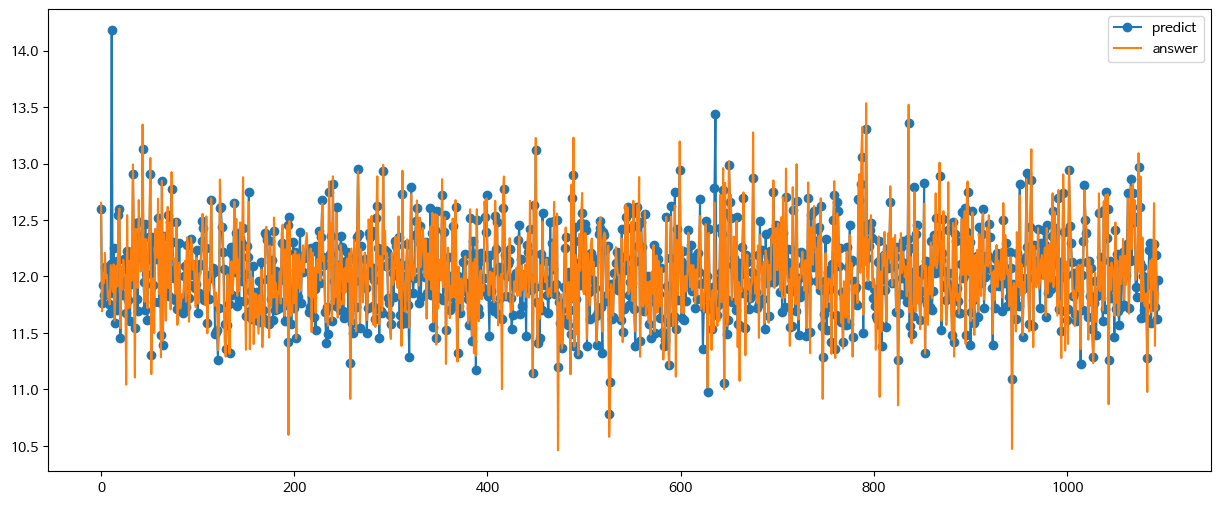

In [ ]:
# 그래프를 그려보았을때도, 선형회귀와 큰 차이를 보이지 않는다.
train_predict=pd.DataFrame(gs.predict(train_input), index=train_tar.index, columns=['predict'])
train_tar=pd.DataFrame(train_target)

df2=train_tar.merge(train_predict,on=train_tar.index)

plt.figure(figsize=(15,6))
plt.plot(df2['predict'],'o-',label='predict')
plt.plot(df2['SalePrice'],'-',label='answer')
plt.legend()

In [ ]:
# 결론
# int데이터만으로는 모델의 정확도를 높이는데 한계가 있다고 생각할 수 있었다.
# obj컬럼을 추가하고 파생변수를 생성하여 모델의 복잡도를 높여보면 정확도를 높일 수 있을 것이라고 생각된다.

#느낀점

In [ ]:
# 느낀점

# 1. 전처리의 중요성
# 전처리를 하기 위해선 기본적인 데이터의 이해가 중요했다. 단순히 모델을 구현하는 것보다, 어떤 데이터가 있고 이 데이터가 무엇을 의미하는지 파악하는 것이 더 중요했다.
# 어떤 컬럼이 어떤 의미를 가지는지 파악해야 모델의 피처로 사용할때 어려움이 없었다. 특히, 이번 주택가격을 예측하는경우 70여개의 컬럼이 존재했다.
# 이를 전처리하는 것은 무엇보다 내가 다루고 있는 데이터에 관한 지식이 중요했다.

# 2. 변수를 선정하는 기준
# 이번 int컬럼의 경우 상관계수가 0.3이상인 컬럼들만 사용하여 모델에 넣었다.
# 다양한 데이터를 다뤄보고 자신만의 변수 설정 기준이 있어야만 모델의 성능을 향상시킬 수 있을 것이라고 생각이 들었다.

# 3. obj컬럼과 파생변수 만들기
# obj컬럼을 사용하지 않은 이유는 다중공선성의 문제, obj컬럼의 인코딩문제, 파생변수를 만드는 문제 등 다양했다.
# 다음 과제를 제출할때에는 이를 해결하는 법을 찾아서 obj컬럼, 파생변수 생성까지 완료하여 모델의 정확도를 높인 뒤, test데이터를 예측하여 실제 캐글대회에 제출하여 정확도의 등수를 파악해보고 싶다.


3